In [1]:
from deepom.bionano_utils import MoleculeSelector

selector = MoleculeSelector()
selector.top_mol_num = 10
selector.select_molecules()

selected: 0it [00:00, ?it/s]

## Yevgeni's part 

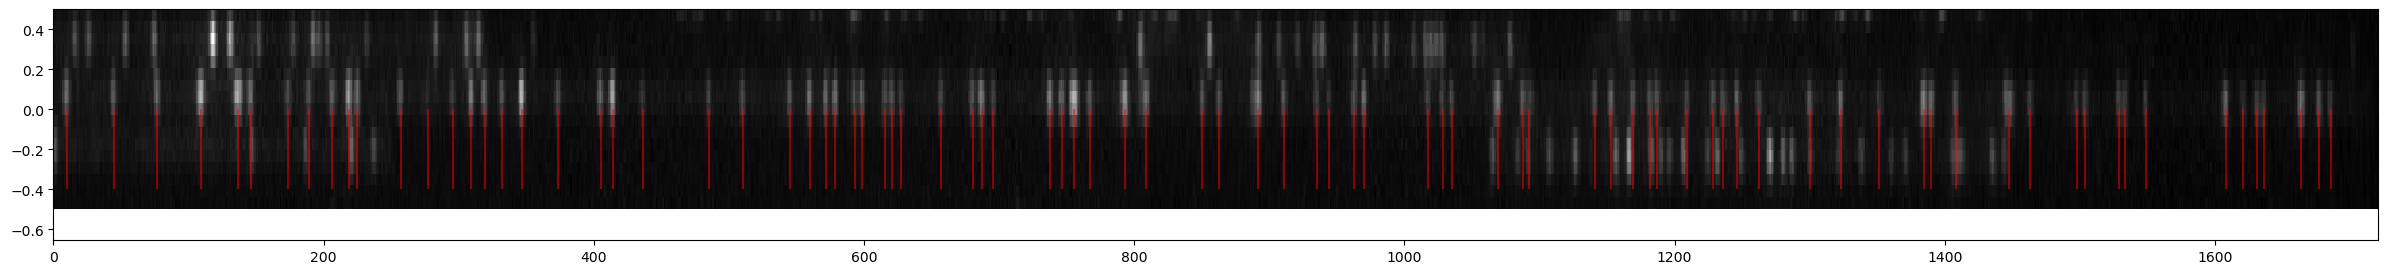

In [2]:
selector.selected[2].plot_bnx_item()

In [19]:
from deepom.bionano_compare import BionanoCompare
 
compare = BionanoCompare()
compare.read_cmap()
compare.make_refs()
compare.refs

1     [14453.0, 19686.0, 22554.0, 31191.0, 33547.0, ...
2     [15924.0, 22064.0, 28594.0, 34027.0, 34664.0, ...
3     [12734.0, 13105.0, 17438.0, 20151.0, 26344.0, ...
4     [12985.0, 14575.0, 23028.0, 27375.0, 35689.0, ...
5     [19314.0, 19924.0, 22572.0, 48655.0, 52154.0, ...
6     [76216.0, 78491.0, 80268.0, 84078.0, 92283.0, ...
7     [10487.0, 12916.0, 15501.0, 17193.0, 18142.0, ...
8     [61805.0, 66488.0, 70256.0, 73189.0, 79269.0, ...
9     [14566.0, 19799.0, 22667.0, 30973.0, 33330.0, ...
10    [18514.0, 19074.0, 29291.0, 29794.0, 32222.0, ...
11    [60457.0, 62233.0, 66043.0, 73015.0, 81386.0, ...
12    [14568.0, 19721.0, 24617.0, 33245.0, 35595.0, ...
13    [16004725.0, 16010361.0, 16021642.0, 16136233....
14    [16004725.0, 16010361.0, 16021642.0, 16031132....
15    [17050953.0, 17052426.0, 17058646.0, 17060180....
16    [14134.0, 19375.0, 28229.0, 38092.0, 44607.0, ...
17    [66653.0, 70073.0, 84695.0, 84709.0, 90870.0, ...
18    [18868.0, 19428.0, 29621.0, 30124.0, 32552

In [4]:
from deepom.config import Config
from deepom.localizer import LocalizerModule
import monai

localizer_module = LocalizerModule()
localizer_module.checkpoint_search_dir = Config.CHECKPOINT_SEARCH_DIR
localizer_module.load_checkpoint = True
localizer_module.init_ensure_module()

BasicUNet features: (32, 32, 64, 128, 256, 32).
loading checkpoint:  /home/deepom/DeepOM/data/pretrained/checkpoint.pickle 




/home/deepom/miniconda3/envs/deepom/lib/python3.9/site-packages/monai/utils/deprecate_utils.py:107: FutureWarning: <class 'monai.transforms.utility.array.AddChannel'>: Class `AddChannel` has been deprecated since version 0.8. please use MetaTensor data type and monai.transforms.EnsureChannelFirst instead.
  warn_deprecated(obj, msg, warning_category)


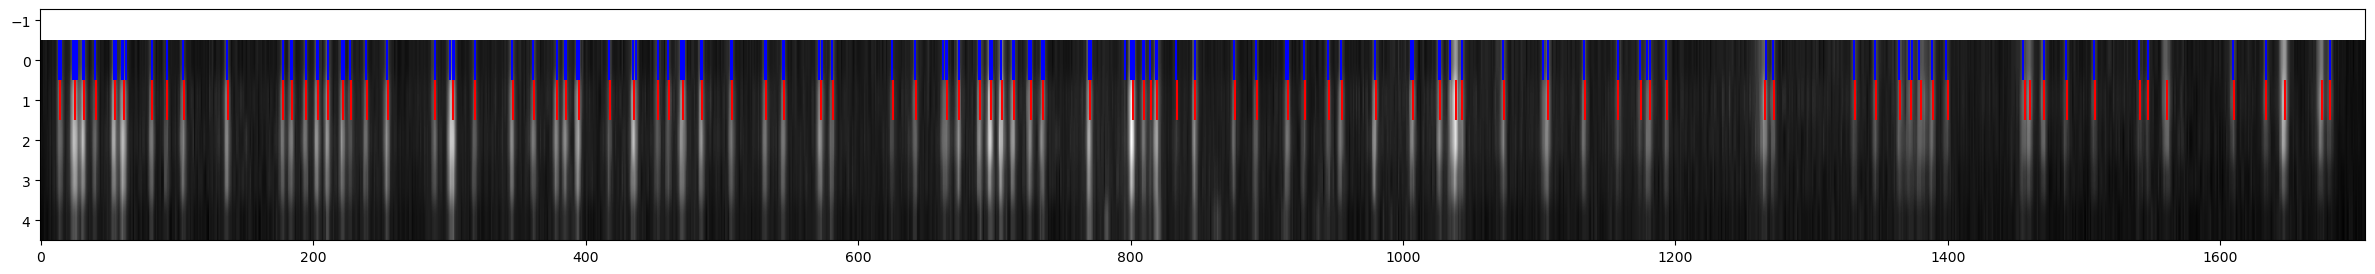

In [5]:
from matplotlib.pyplot import eventplot, imshow, figure, xlim
i=3
#good molecules: 0,7,6
figure(figsize=(30, 3))
image_input = selector.selected[i].bionano_image.segment_image[0]
target_width = localizer_module.image_channels
source_width = image_input.shape[0] // 2 + 1
image_input = image_input[source_width - target_width // 2: source_width + target_width // 2 + 1]
imshow(image_input, aspect="auto", cmap="gray")
inference_item = localizer_module.inference_item(image_input)
eventplot([inference_item.loc_pred, selector.selected[i].locs / 375], colors=["b", "r"])
# xlim([0, 500])

In [6]:
image_input.shape[0]

5

In [7]:
inference_item.loc_pred

array([  13.62765551,   14.69124418,   23.33261916,   24.51522267,
         25.50928301,   26.58675516,   30.57306689,   31.59910369,
         39.75977594,   53.46091932,   54.76914692,   59.69638968,
         60.32009465,   62.13172352,   81.36835283,   92.25711015,
        104.64738894,  136.74546587,  177.50475317,  183.28804687,
        184.38054922,  194.34272605,  202.60690212,  203.20942205,
        210.70013279,  220.84153754,  221.66309744,  222.1707582 ,
        227.25238493,  238.62885648,  253.79309464,  254.39727512,
        289.1616852 ,  300.50595552,  302.67289424,  303.17812455,
        318.45596069,  345.80586493,  361.65986097,  378.6508916 ,
        384.55221623,  385.60984963,  393.8283971 ,  394.72864676,
        417.32794437,  434.66052061,  436.82654315,  452.78752726,
        460.70751959,  469.79502082,  470.47018319,  472.43312231,
        484.77677447,  485.26909918,  506.55482447,  507.62342405,
        531.48677334,  532.27867573,  544.57513833,  545.68307

In [8]:
selector.selected[i].bionano_image.segment_image

array([[[383.94174896, 438.72989656, 428.95707327, ..., 352.79875754,
         370.84626992, 333.61155199],
        [369.3935238 , 410.62972932, 416.44276819, ..., 335.21174937,
         369.14969057, 331.46528203],
        [356.32925793, 380.88318202, 383.35976819, ..., 318.36574273,
         321.7592158 , 337.55566412],
        ...,
        [341.4815472 , 340.04637107, 323.09475669, ..., 302.42101605,
         346.78199445, 325.21036221],
        [325.1487856 , 331.30338666, 315.24091029, ..., 294.87585741,
         341.2244638 , 322.77018471],
        [340.31373312, 333.02659735, 321.54666912, ..., 303.3535465 ,
         331.55681085, 309.6041115 ]]])

In [9]:
from deepom.aligner import Aligner
from deepom.my_utils import overlap_percentage
import numpy as np

ref_id = selector.selected[i].xmap_item.ref_id
aligner_reg = Aligner()
aligner_reg.align_params = {}

aligner_rev = Aligner()
aligner_rev.align_params = {}

qry = inference_item.loc_pred * 335

inverted_qry = np.sort((inference_item.loc_pred[-1] - inference_item.loc_pred)*335) #not sure, need to make sure its correct

aligner_reg.make_alignment(qry=qry, ref=compare.refs[ref_id])
selector.selected[i].xmap_item.ref_lims, aligner_reg.alignment_ref[[0, -1]] # aligner.alignment_qry

(array([70523527., 71052014.]), array([8232631., 8555209.]))

In [10]:
aligner_rev.make_alignment(qry=inverted_qry, ref=compare.refs[ref_id])
selector.selected[i].xmap_item.ref_lims, aligner_rev.alignment_ref[[0, -1]], # aligner.alignment_qry

(array([70523527., 71052014.]), array([70525302., 71052014.]))

In [11]:
regular_overlap = overlap_percentage(selector.selected[i].xmap_item.ref_lims, aligner_reg.alignment_ref[[0, -1]])
reverse_overlap = overlap_percentage(selector.selected[i].xmap_item.ref_lims, aligner_rev.alignment_ref[[0, -1]])

aligner = aligner_reg if regular_overlap > reverse_overlap else aligner_rev

regular_overlap*100, reverse_overlap*100

(0.0, 99.8317852841028)

In [12]:
import numpy
from scipy.interpolate import interp1d
from deepom.my_utils import getAligner , get_scaler_from_aligner

ImportError: cannot import name 'getAligner' from 'deepom.my_utils' (/home/deepom/DeepOM/deepom/my_utils.py)

In [ ]:
scaler = get_scaler_from_aligner(aligner)

z = aligner.alignment_ref
y = (z-z[0]) / (scaler*335)
y = y+aligner.alignment_qry[0] /335
x = aligner.alignment_qry/335
f = interp1d(x=y,y=x)

# a = numpy.zeros_like(aligner.alignment_ref)
# b = numpy.zeros_like(aligner.alignment_ref)

In [ ]:
# scaler = scaler = get_scaler_from_aligner(aligner_rev)

# z = aligner_rev.alignment_ref
# y = (z-z[0]) / (scaler*335)
# y = y+aligner_rev.alignment_qry[0] /335
# x = aligner_rev.alignment_qry/335
# f = interp1d(x=y,y=x)

# a = numpy.zeros_like(aligner.alignment_ref)
# b = numpy.zeros_like(aligner.alignment_ref)

# ref = compare.refs[ref_id]
# start, end = aligner_rev.alignment_ref[[0, -1]]
# start_index = np.argmax(ref >= start)
# end_index = np.argmin(ref <= end)
# ref_crop = ref[start_index:end_index]

In [ ]:
ref = compare.refs[ref_id]
start, end = aligner.alignment_ref[[0, -1]]
start_index = np.argmax(ref >= start)
end_index = np.argmin(ref <= end)
ref_crop = ref[start_index:end_index]


In [ ]:
z_hat = (ref_crop-ref_crop[0]) / (scaler*335)
z_hat = z_hat+x[0]
y_hat = f(z_hat)

In [ ]:
figure(figsize=(30, 3))
image_input = selector.selected[i].bionano_image.segment_image[0]
target_width = localizer_module.image_channels
source_width = image_input.shape[0] // 2 + 1
image_input = image_input[source_width - target_width // 2: source_width + target_width // 2 + 1]
imshow(image_input, aspect="auto", cmap="gray")
eventplot([inference_item.loc_pred, x,y_hat], colors=["g", "b", "r"])
xlim([0, 800])

## Our Part

In [ ]:
from deepom.utils import Config
from deepom.bionano_compare import DataPrep
from deepom.bionano_utils import BNXItemCrop, BionanoFileData
from numpy.random import default_rng
from deepom.localizer import LocalizerModule
from deepom.aligner import Aligner
from deepom.my_utils import getAligner
from matplotlib.pyplot import eventplot, imshow, figure, xlim
from pandas import Series, DataFrame
import numpy as np
from tqdm import tqdm, tnrange , tqdm_notebook



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from deepom.config import Config
from deepom.localizer import LocalizerModule
import monai


In [ ]:
crop_size_bp = 50  *1000
crop_size = int(crop_size_bp / Config.BIONANO_NOMINAL_SCALE)

In [ ]:
localizer_module = LocalizerModule()
localizer_module.checkpoint_search_dir = Config.CHECKPOINT_SEARCH_DIR
localizer_module.load_checkpoint = True
localizer_module.init_ensure_module()
localizer_module.rng = default_rng(seed=42)

In [ ]:
cmap_file_data = BionanoFileData()
cmap_file_data.file = Config.REF_CMAP_FILE
cmap_file_data.read_bionano_file()

refs = Series({
    ref_id: ref_df[ref_df["LabelChannel"] == 1]["Position"].values
    for ref_id, ref_df in cmap_file_data.file_df.groupby("CMapId")
    })

## Iterate over selected molecules, crop localize and align

In [ ]:
rng = default_rng(seed=42)
mol_ranks = dict.fromkeys(range(24),0)

for i, mol in tqdm_notebook(enumerate(selector.selected)):

    
    image_len = mol.bionano_image.segment_image.shape[-1]
    start = rng.integers(0,image_len - crop_size)
    stop = start + crop_size
    
    segment_image = mol.bionano_image.segment_image[...,start: stop]
    crop = BNXItemCrop(mol, (start, stop), i)
    crop.crop_size_pixels = crop_size
    crop.crop_size_bp = crop_size_bp
    crop.segment_image = segment_image
    
    # finished croping image. moving to locolaizer
    
    figure(figsize=(30, 3))
    image_input = crop.segment_image[0]
    target_width = localizer_module.image_channels
    source_width = image_input.shape[0] // 2 + 1
    image_input = image_input[source_width - target_width // 2: source_width + target_width // 2 + 1]
    # imshow(image_input, aspect="auto", cmap="gray")
    inference_item = localizer_module.inference_item(image_input)
    # eventplot([inference_item.loc_pred, selector.selected[0].locs / 375], colors=["b", "r"])
    # xlim([0, 50])
    
    # run analyzer for each molecule, saving all results
    qry = inference_item.loc_pred * 335
    inverted_qry = np.sort((stop - inference_item.loc_pred)*335) #not sure, need to make sure its correct
   

    
    len_ref = range(1,len(refs)+1)
    scores = {}
    for j in tqdm_notebook(len_ref,desc = str(i+1)):
        
        aligner1 = getAligner()
        aligner1.make_alignment(qry=qry, ref=refs[j])
        score = aligner1.score
        
        aligner2 = getAligner()
        aligner2.make_alignment(qry=inverted_qry, ref=refs[j])
        
        scores[str(j)] = max(score , aligner2.score)
        scores[str(j)] = score

    scores = dict(sorted(scores.items(), key=lambda score: -score[1]))
    mol_rank = list(scores.keys()).index(str(mol.xmap_item.ref_id))
    mol_ranks[mol_rank] += 1 

    
    

In [ ]:
mol_ranks[0]/sum(mol_ranks)

In [ ]:
localizer_module.image_data.targets

In [ ]:
x = 2 + 3